# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
my_data = pd.read_csv(r"C:\Users\kisor\Downloads\aishuDAjobs2.csv")
my_data

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Industry,Sector,Salary Max,Salary Min
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Social Assistance,Non-Profit,66.0,37.0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Health Care Services & Hospitals,Health Care,66.0,37.0
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Internet,Information Technology,66.0,37.0
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,IT Services,Information Technology,66.0,37.0
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,Sports & Recreation,"Arts, Entertainment & Recreation",66.0,37.0
...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,Staffing & Outsourcing,Business Services,104.0,78.0
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Wholesale,Business Services,104.0,78.0
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",0.0,NaN,Unknown,104.0,78.0
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Enterprise Software & Network Solutions,Information Technology,104.0,78.0


In [6]:
my_data.shape

(2253, 9)

In [7]:
# Info our dataset
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2253 non-null   int64  
 1   Job Title        2253 non-null   object 
 2   Salary Estimate  2252 non-null   object 
 3   Job Description  2253 non-null   object 
 4   Rating           2253 non-null   float64
 5   Industry         1900 non-null   object 
 6   Sector           2253 non-null   object 
 7   Salary Max       2252 non-null   float64
 8   Salary Min       2252 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 158.5+ KB


In [8]:
# Describe our dataset
my_data.describe()

,Unnamed: 0,Rating,Salary Max,Salary Min
count,2253.0000,2253.000000,2252.000000,2252.000000
mean,1126.0000,3.281358,89.979130,51.678508
std,650.5294,1.368988,29.315605,18.446378
min,0.0000,0.000000,38.000000,11.000000
25%,563.0000,3.100000,70.000000,41.000000
50%,1126.0000,3.600000,87.000000,49.000000
75%,1689.0000,4.000000,104.000000,60.000000
max,2252.0000,5.000000,190.000000,99.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

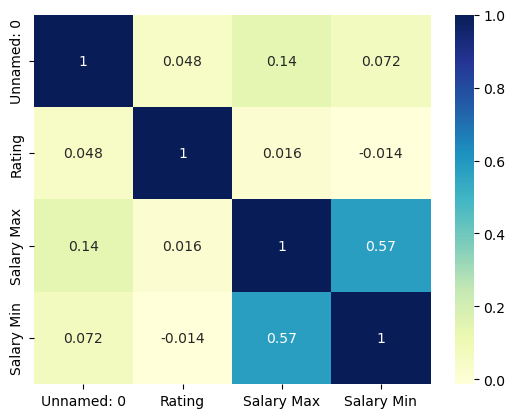

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.heatmap(my_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Seeing the data using heatmap,there is no strong correlation in the dataset which is difficult to perform linear regression.

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [22]:
# I still tried linear regression to know the R-squared value to confirm the correlation strength.
# Assigning  x and y
X = my_data['Rating']
Y = my_data['Salary Max']

In [16]:
#Creating train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train

965     3.3
40      0.0
1440    4.3
1260    5.0
9       4.4
       ... 
350     0.0
1930    0.0
79      4.0
1859    2.3
1544    4.1
Name: Rating, Length: 1577, dtype: float64

In [17]:
# Buildong the model. 
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const     88.444316
Rating     0.483060
dtype: float64

In [18]:
# perform residual analysis
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary Max   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8186
Date:                Thu, 08 Jun 2023   Prob (F-statistic):              0.366
Time:                        11:51:59   Log-Likelihood:                -7582.2
No. Observations:                1577   AIC:                         1.517e+04
Df Residuals:                    1575   BIC:                         1.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.4443      1.881     47.018      0.000      84.755      92.134
Rating         0.4831      0.534      0.905      0.366      -0.564       1.530
==============================================================================
Omnibus:                      224.383   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.569
Skew:                           0.943   Prob(JB):                     9.25e-81
Kurtosis:                       4.432   Cond. No.                         9.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# It turns out the correlation between rating and salay max is week as the R-squared value is low,
# which means linear regression is not the best type of predictive analysis for this daatset.


## Error Terms

Finally, plot your error terms!

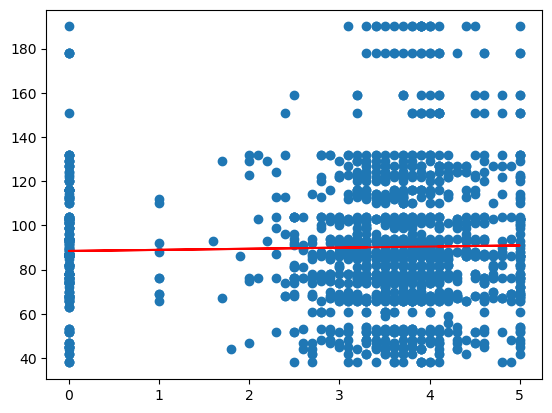

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 88.44 + 0.5*X_train, 'r')
plt.show()

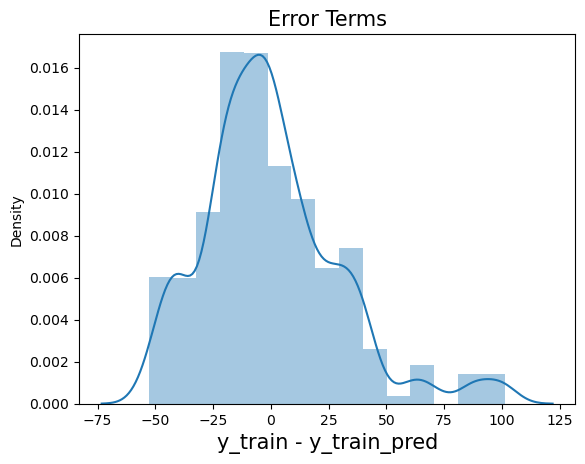

In [21]:
y_train_pred = lr.predict(X_train_sm)
res= (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?                           
   ANS:  The R-squared value is 0.001.
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?                
    ANS : Due to the low R-squared value, a linear regression model may not be the best choice for predictive analysis.
3. Was your plot of the error terms a bell curve?                               
    ANS : No, the plot of the error terms does not follow a bell curve.